In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import tensorflow as tf
import pyupbit
import pybithumb
import ccxt
import datetime
%matplotlib inline
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams["figure.figsize"] = (14,10) #그림(figure)의 크기. (가로,세로) 인치 단위
plt.rcParams['lines.linewidth'] = 2 #선의 두께
# plt.rcParams['lines.color'] = 'r' #선의 색깔
plt.rcParams['axes.grid'] = True #차트내 격자선(grid) 표시 여부

binance = ccxt.binance()
markets = binance.fetch_tickers()

<ipython-input-2-5720f57da8a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Date'][i] = datetime.datetime.fromtimestamp(dft['Date'][i]/1000)#.strftime('%Y-%m-%d %H:%M:%S')
INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


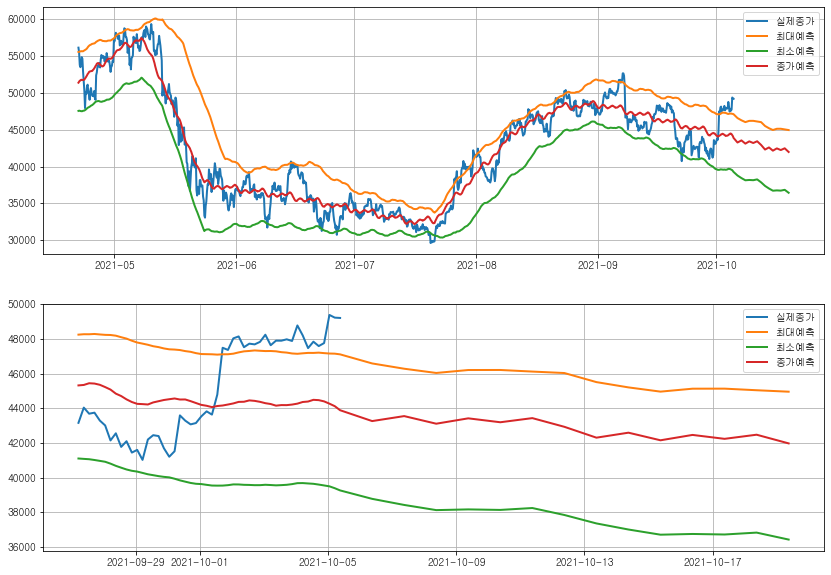

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


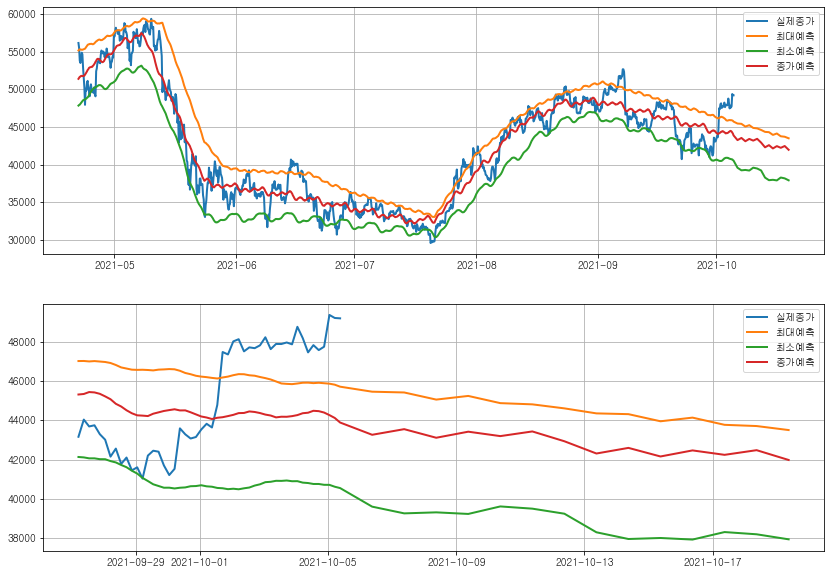

In [2]:
ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe='4h', limit=14000)
dft = pd.DataFrame(ohlcv, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
for i in dft.index:
    dft['Date'][i] = datetime.datetime.fromtimestamp(dft['Date'][i]/1000)#.strftime('%Y-%m-%d %H:%M:%S')
dft.set_index('Date', inplace=True)
n = 42
dft['ndays_high'] = dft['High'].rolling(window=n, min_periods=1).max()
dft['ndays_low'] = dft['Low'].rolling(window=n, min_periods=1).min()
dfh = pd.DataFrame(dft.sort_index().reset_index(), columns=['Date', 'Close', 'ndays_high', 'ndays_low'])
dfhh = dfh.rename(columns = {'Date':'ds', 'ndays_high':'y'})
dfhl = dfh.rename(columns = {'Date':'ds', 'ndays_low':'y'})
dfhc = dfh.rename(columns = {'Date':'ds', 'Close':'y'})
from prophet import Prophet
mh = Prophet()
ml = Prophet()
mc = Prophet()
mh.fit(dfhh)
ml.fit(dfhl)
mc.fit(dfhc)
futurel = ml.make_future_dataframe(periods=14)
futureh = mh.make_future_dataframe(periods=14)
futurec = mc.make_future_dataframe(periods=14)
forecasth = mh.predict(futureh)
forecastl = ml.predict(futurel)
forecastc = mc.predict(futurel)
plt.subplot(211)
plt.plot(dfh['Date'], dfh['Close'], label='실제종가')
plt.plot(forecasth['ds'], forecasth['yhat'], label='최대예측')
plt.plot(forecastl['ds'], forecastl['yhat'], label='최소예측')
plt.plot(forecastc['ds'], forecastc['yhat'], label='종가예측')
plt.legend()
plt.subplot(212)
plt.plot(dfh['Date'][-50:], dfh['Close'][-50:], label='실제종가')
plt.plot(forecasth['ds'][-50-14:], forecasth['yhat'][-50-14:], label='최대예측')
plt.plot(forecastl['ds'][-50-14:], forecastl['yhat'][-50-14:], label='최소예측')
plt.plot(forecastc['ds'][-50-14:], forecastc['yhat'][-50-14:], label='종가예측')
plt.legend()
plt.show()
n = 21
dft['ndays_high'] = dft['High'].rolling(window=n, min_periods=1).max()
dft['ndays_low'] = dft['Low'].rolling(window=n, min_periods=1).min()
dfh = pd.DataFrame(dft.sort_index().reset_index(), columns=['Date', 'Close', 'ndays_high', 'ndays_low'])
dfhh = dfh.rename(columns = {'Date':'ds', 'ndays_high':'y'})
dfhl = dfh.rename(columns = {'Date':'ds', 'ndays_low':'y'})
dfhc = dfh.rename(columns = {'Date':'ds', 'Close':'y'})
from prophet import Prophet
mh = Prophet()
ml = Prophet()
mc = Prophet()
mh.fit(dfhh)
ml.fit(dfhl)
mc.fit(dfhc)
futurel = ml.make_future_dataframe(periods=14)
futureh = mh.make_future_dataframe(periods=14)
futurec = mc.make_future_dataframe(periods=14)
forecasth = mh.predict(futureh)
forecastl = ml.predict(futurel)
forecastc = mc.predict(futurel)
plt.subplot(211)
plt.plot(dfh['Date'], dfh['Close'], label='실제종가')
plt.plot(forecasth['ds'], forecasth['yhat'], label='최대예측')
plt.plot(forecastl['ds'], forecastl['yhat'], label='최소예측')
plt.plot(forecastc['ds'], forecastc['yhat'], label='종가예측')
plt.legend()
plt.subplot(212)
plt.plot(dfh['Date'][-50:], dfh['Close'][-50:], label='실제종가')
plt.plot(forecasth['ds'][-50-14:], forecasth['yhat'][-50-14:], label='최대예측')
plt.plot(forecastl['ds'][-50-14:], forecastl['yhat'][-50-14:], label='최소예측')
plt.plot(forecastc['ds'][-50-14:], forecastc['yhat'][-50-14:], label='종가예측')
plt.legend()
plt.show()

<ipython-input-4-257fb8d280ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Date'][i] = datetime.datetime.fromtimestamp(dft['Date'][i]/1000)#.strftime('%Y-%m-%d %H:%M:%S')
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


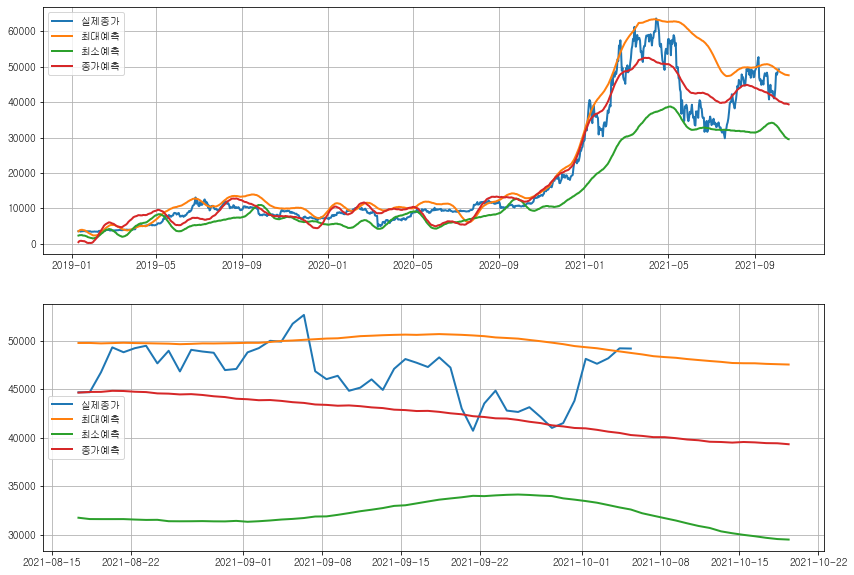

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


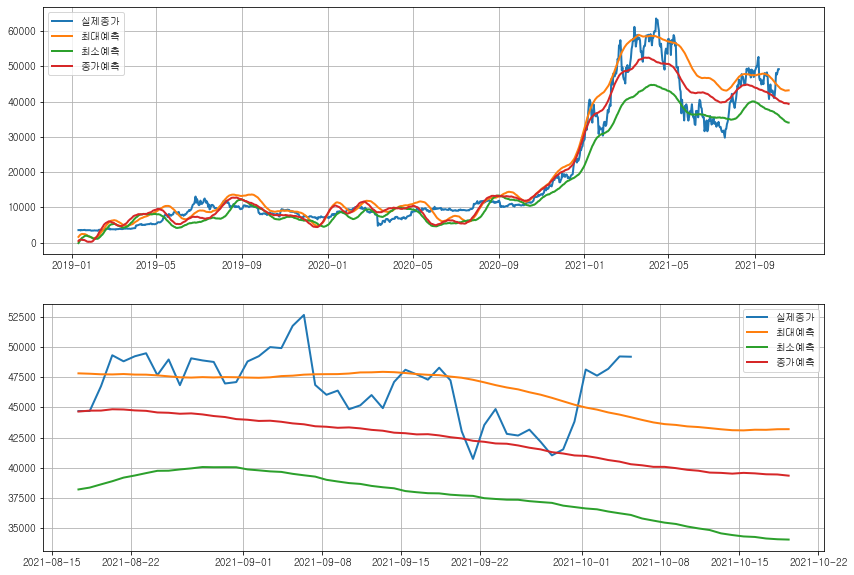

In [4]:
ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe='1d', limit=14000)
dft = pd.DataFrame(ohlcv, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
for i in dft.index:
    dft['Date'][i] = datetime.datetime.fromtimestamp(dft['Date'][i]/1000)#.strftime('%Y-%m-%d %H:%M:%S')
dft.set_index('Date', inplace=True)
n = 50
dft['ndays_high'] = dft['High'].rolling(window=n, min_periods=1).max()
dft['ndays_low'] = dft['Low'].rolling(window=n, min_periods=1).min()
dfh = pd.DataFrame(dft.sort_index().reset_index(), columns=['Date', 'Close', 'ndays_high', 'ndays_low'])
dfhh = dfh.rename(columns = {'Date':'ds', 'ndays_high':'y'})
dfhl = dfh.rename(columns = {'Date':'ds', 'ndays_low':'y'})
dfhc = dfh.rename(columns = {'Date':'ds', 'Close':'y'})
from prophet import Prophet
mh = Prophet()
ml = Prophet()
mc = Prophet()
mh.fit(dfhh)
ml.fit(dfhl)
mc.fit(dfhc)
futurel = ml.make_future_dataframe(periods=14)
futureh = mh.make_future_dataframe(periods=14)
futurec = mc.make_future_dataframe(periods=14)
forecasth = mh.predict(futureh)
forecastl = ml.predict(futurel)
forecastc = mc.predict(futurel)
plt.subplot(211)
plt.plot(dfh['Date'], dfh['Close'], label='실제종가')
plt.plot(forecasth['ds'], forecasth['yhat'], label='최대예측')
plt.plot(forecastl['ds'], forecastl['yhat'], label='최소예측')
plt.plot(forecastc['ds'], forecastc['yhat'], label='종가예측')
plt.legend()
plt.subplot(212)
plt.plot(dfh['Date'][-50:], dfh['Close'][-50:], label='실제종가')
plt.plot(forecasth['ds'][-50-14:], forecasth['yhat'][-50-14:], label='최대예측')
plt.plot(forecastl['ds'][-50-14:], forecastl['yhat'][-50-14:], label='최소예측')
plt.plot(forecastc['ds'][-50-14:], forecastc['yhat'][-50-14:], label='종가예측')
plt.legend()
plt.show()
n = 15
dft['ndays_high'] = dft['High'].rolling(window=n, min_periods=1).max()
dft['ndays_low'] = dft['Low'].rolling(window=n, min_periods=1).min()
dfh = pd.DataFrame(dft.sort_index().reset_index(), columns=['Date', 'Close', 'ndays_high', 'ndays_low'])
dfhh = dfh.rename(columns = {'Date':'ds', 'ndays_high':'y'})
dfhl = dfh.rename(columns = {'Date':'ds', 'ndays_low':'y'})
dfhc = dfh.rename(columns = {'Date':'ds', 'Close':'y'})
from prophet import Prophet
mh = Prophet()
ml = Prophet()
mc = Prophet()
mh.fit(dfhh)
ml.fit(dfhl)
mc.fit(dfhc)
futurel = ml.make_future_dataframe(periods=14)
futureh = mh.make_future_dataframe(periods=14)
futurec = mc.make_future_dataframe(periods=14)
forecasth = mh.predict(futureh)
forecastl = ml.predict(futurel)
forecastc = mc.predict(futurel)
plt.subplot(211)
plt.plot(dfh['Date'], dfh['Close'], label='실제종가')
plt.plot(forecasth['ds'], forecasth['yhat'], label='최대예측')
plt.plot(forecastl['ds'], forecastl['yhat'], label='최소예측')
plt.plot(forecastc['ds'], forecastc['yhat'], label='종가예측')
plt.legend()
plt.subplot(212)
plt.plot(dfh['Date'][-50:], dfh['Close'][-50:], label='실제종가')
plt.plot(forecasth['ds'][-50-14:], forecasth['yhat'][-50-14:], label='최대예측')
plt.plot(forecastl['ds'][-50-14:], forecastl['yhat'][-50-14:], label='최소예측')
plt.plot(forecastc['ds'][-50-14:], forecastc['yhat'][-50-14:], label='종가예측')
plt.legend()
plt.show()